<a href="https://colab.research.google.com/github/Joyee2021/python_assignment/blob/main/Fraud_Credit_Card_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sn

**Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data=pd.read_csv('/content/creditcard.csv')

**Understanding the data**

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Describing the data**

In [4]:
print(data.shape)
print(data.describe())

(9965, 31)
               Time           V1           V2           V3           V4  \
count   9965.000000  9965.000000  9965.000000  9964.000000  9964.000000   
mean    5934.484897    -0.241681     0.280693     0.906359     0.260247   
std     4449.407112     1.522695     1.308882     1.156948     1.440500   
min        0.000000   -27.670569   -34.607649   -15.496222    -4.657545   
25%     2061.000000    -1.012157    -0.208591     0.412198    -0.615591   
50%     4547.000000    -0.372624     0.286179     0.943149     0.218492   
75%    10163.000000     1.151506     0.900823     1.601871     1.119367   
max    14864.000000     1.960497     8.636214     4.101716    10.463020   

                V5           V6           V7           V8           V9  ...  \
count  9964.000000  9964.000000  9964.000000  9964.000000  9964.000000  ...   
mean     -0.046342     0.132335    -0.071847    -0.065317     0.801220  ...   
std       1.183634     1.307586     1.077872     1.260140     1.156424  ... 

**Determine the umber of fraud cases in dataset**

In [5]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlierfraction=len(fraud)/float(len(valid))
print(outlierfraction)
print("fraud:",len(fraud))
print("valid:",len(valid))

0.0038283296393310496
fraud: 38
valid: 9926


**Print amount details for fraudulent transactions**

In [6]:
print("amount details for fraudulent transactions:",fraud.Amount.describe())


amount details for fraudulent transactions: count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64


**Print amount details for valid transactions**

In [7]:
print("amount details for valid transactions:",valid.Amount.describe())

amount details for valid transactions: count    9926.000000
mean       62.919501
std       184.041297
min         0.000000
25%         5.172500
50%        15.950000
75%        51.067500
max      7712.430000
Name: Amount, dtype: float64


**Correlation matrix**

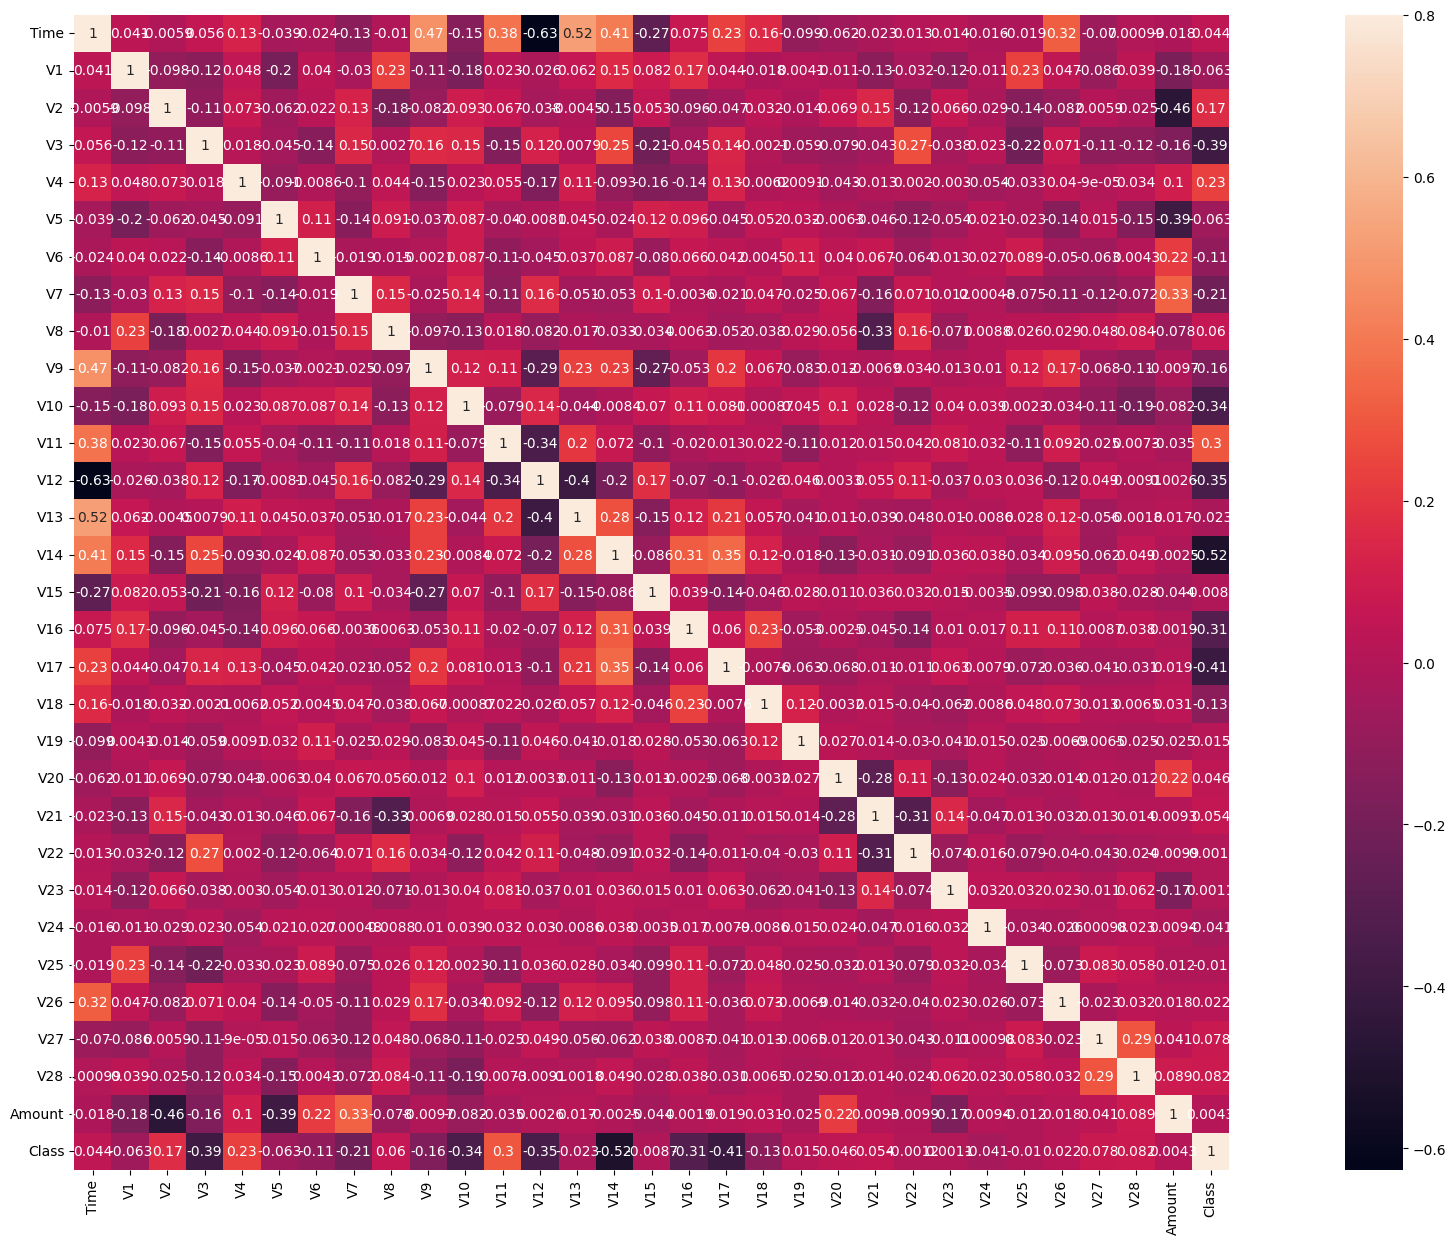

In [8]:
corrmat=data.corr()
fig=plt.figure(figsize=(30,15))
sn.heatmap(corrmat,vmax=0.8,square=True,annot=True)
plt.show()

**Separating the X and Y values**

In [9]:
x=data.drop('Class',axis=1)
y=data['Class']
print(x.shape)
print(y.shape)
xdata=x.values
ydata=y.values


(9965, 30)
(9965,)


**TRain test split**

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.2,random_state=42)

In [11]:
print(xtrain.shape)
print(ytrain.shape)

(7972, 30)
(7972,)


**Building a Random Forest Model using scikit learn**

In [13]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
imputer_y = SimpleImputer(strategy='most_frequent')
ytrain_imputed = imputer_y.fit_transform(ytrain.reshape(-1, 1)).ravel()
from sklearn.ensemble import RandomForestClassifier
xtrain_imputed = imputer_y.fit_transform(xtrain)
xtest_imputed = imputer_y.transform(xtest)
rfc = RandomForestClassifier()
rfc.fit(xtrain_imputed,ytrain_imputed)
# predictions
yPred = rfc.predict(xtest)

**Building all kinds of evaluating parameters**

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
ac=accuracy_score(ytest,yPred)
pc=precision_score(ytest,yPred)
print("The accuracy:",ac)
print("The precision is:",pc)

The accuracy: 0.9989964877069744
The precision is: 1.0


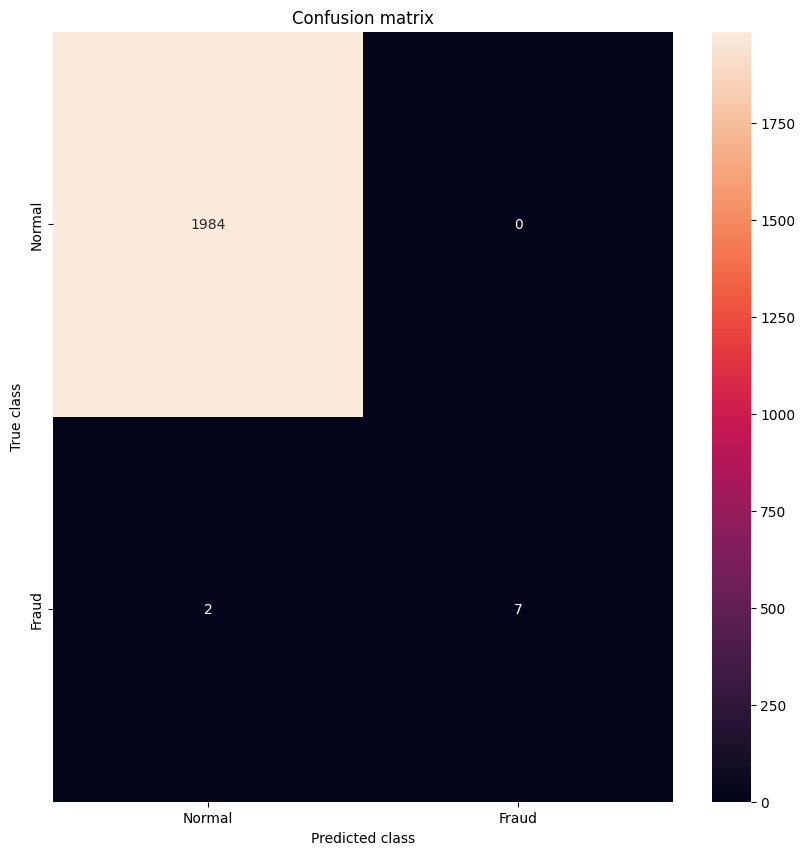

In [15]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, yPred)
plt.figure(figsize =(10, 10))
sn.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [20]:
input=np.array([[50,-0.12,1.25,-2.36,0.58,-7.25,-0.0054,-0.847,2.013,3.1222,-1.2020,-0.005,1.45,2.30,4.521,0.025,0.111,-1.56,-1.7421,-0.2323,-2.7456,-1.3,-1.444,0.04,0.03,0.01,0.23,-4.22,1.2,3000.7]])
res=rfc.predict(input)
if res[0]==1:
  print("The transaction is predicted to be fraudulent.")
else:
  print("The transaction is predicted to be valid.")

The transaction is predicted to be valid.
